In [1]:
print("hello")

hello


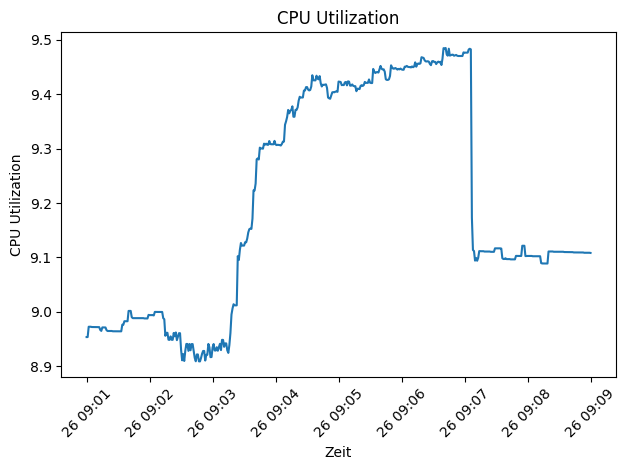

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV einlesen und die ersten 5 Zeilen (Metadaten) überspringen
df = pd.read_csv('b1-ram.csv', skiprows=5, header=None, names=['Timestamp', 'Value'])

# Zeilen filtern, in denen ein vollständiger Zeitstempel enthalten ist
df = df[df['Timestamp'].str.contains(r'\d{4}/\d{2}/\d{2}')]

# Zeitstempel in datetime-Objekte umwandeln
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y/%m/%d %H:%M:%S')

# Messwerte in float umwandeln
df['Value'] = df['Value'].astype(float)

# Start- und Endzeit definieren (als Beispiel)
start_time = pd.to_datetime('2025-01-26 09:01:00')
end_time   = pd.to_datetime('2025-01-26 09:09:00')

# DataFrame auf den gewünschten Zeitraum filtern
df_filtered = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]

# Plotten mit seaborn
sns.lineplot(x='Timestamp', y='Value', data=df_filtered)
plt.xlabel('Zeit')
plt.ylabel('CPU Utilization')
plt.title('CPU Utilization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-13-d7a46298a88d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Smoothed'] = df_filtered['Value'].ewm(span=10, adjust=False).mean()


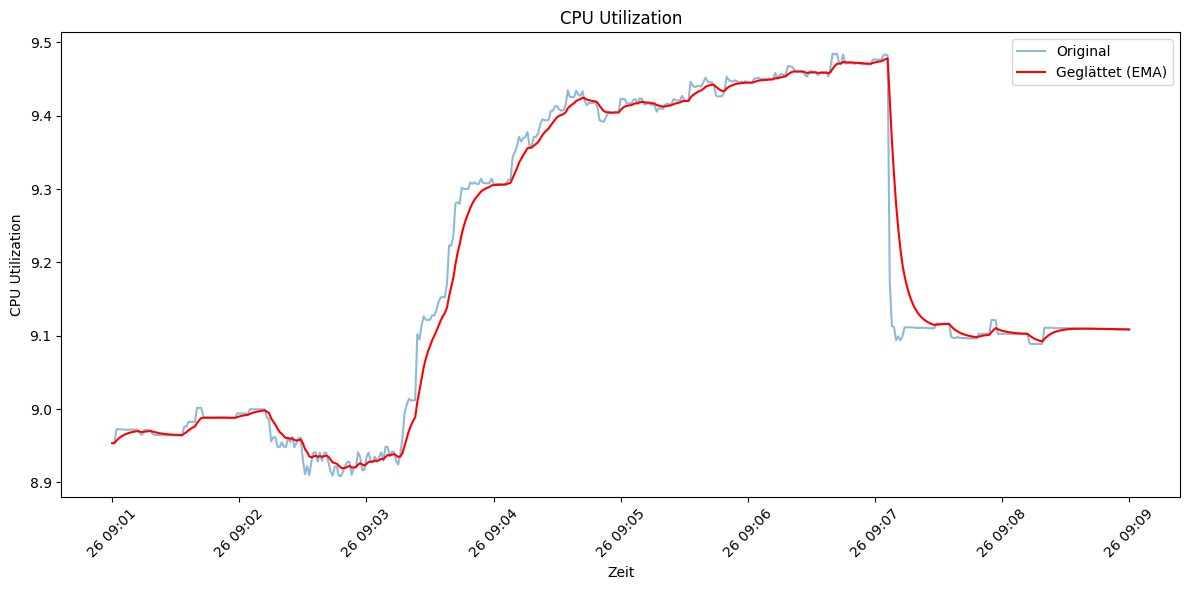

In [13]:
# Exponentieller Gleitender Mittelwert
df_filtered['Smoothed'] = df_filtered['Value'].ewm(span=10, adjust=False).mean()

# Plotten der geglätteten Linie
plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='Value', data=df_filtered, label='Original', alpha=0.5)
sns.lineplot(x='Timestamp', y='Smoothed', data=df_filtered, label='Geglättet (EMA)', color='red')
plt.xlabel('Zeit')
plt.ylabel('CPU Utilization')
plt.title('CPU Utilization')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


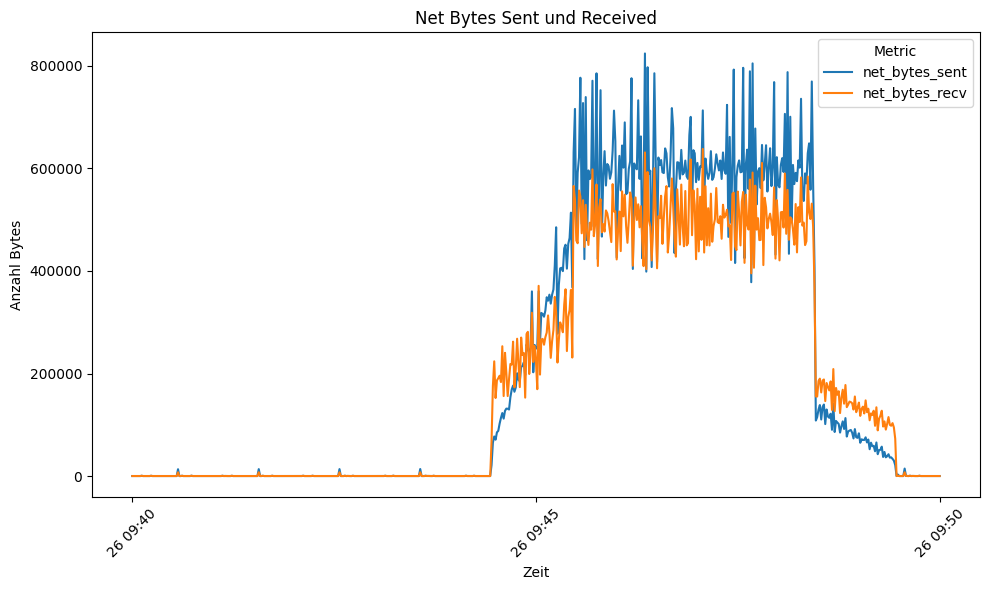

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV-Datei einlesen und die ersten 5 Zeilen (Metadaten) überspringen
df = pd.read_csv('b2-bytes.csv', skiprows=5, header=None,
                 names=['Timestamp', 'net_bytes_sent', 'net_bytes_recv'])

# Konvertiere die Timestamp-Spalte in datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y/%m/%d %H:%M:%S')

# Stelle sicher, dass die Messwerte numerisch sind
df['net_bytes_sent'] = pd.to_numeric(df['net_bytes_sent'], errors='coerce')
df['net_bytes_recv'] = pd.to_numeric(df['net_bytes_recv'], errors='coerce')

start_time = pd.to_datetime('2025-01-26 09:40:00')
end_time   = pd.to_datetime('2025-01-26 09:50:00')

# DataFrame auf den gewünschten Zeitraum filtern
df_filtered = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]

# Falls du beide Metriken in einem einzigen Plot darstellen möchtest, forme die Daten um:
df_melted = df_filtered.melt(id_vars=['Timestamp'],
                    value_vars=['net_bytes_sent', 'net_bytes_recv'],
                    var_name='Metric',
                    value_name='Value')


# Plot mit Seaborn: Jede Metrik wird farblich unterschieden
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Timestamp', y='Value', hue='Metric')
plt.xlabel("Zeit")
plt.ylabel("Anzahl Bytes")
plt.title("Net Bytes Sent und Received")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


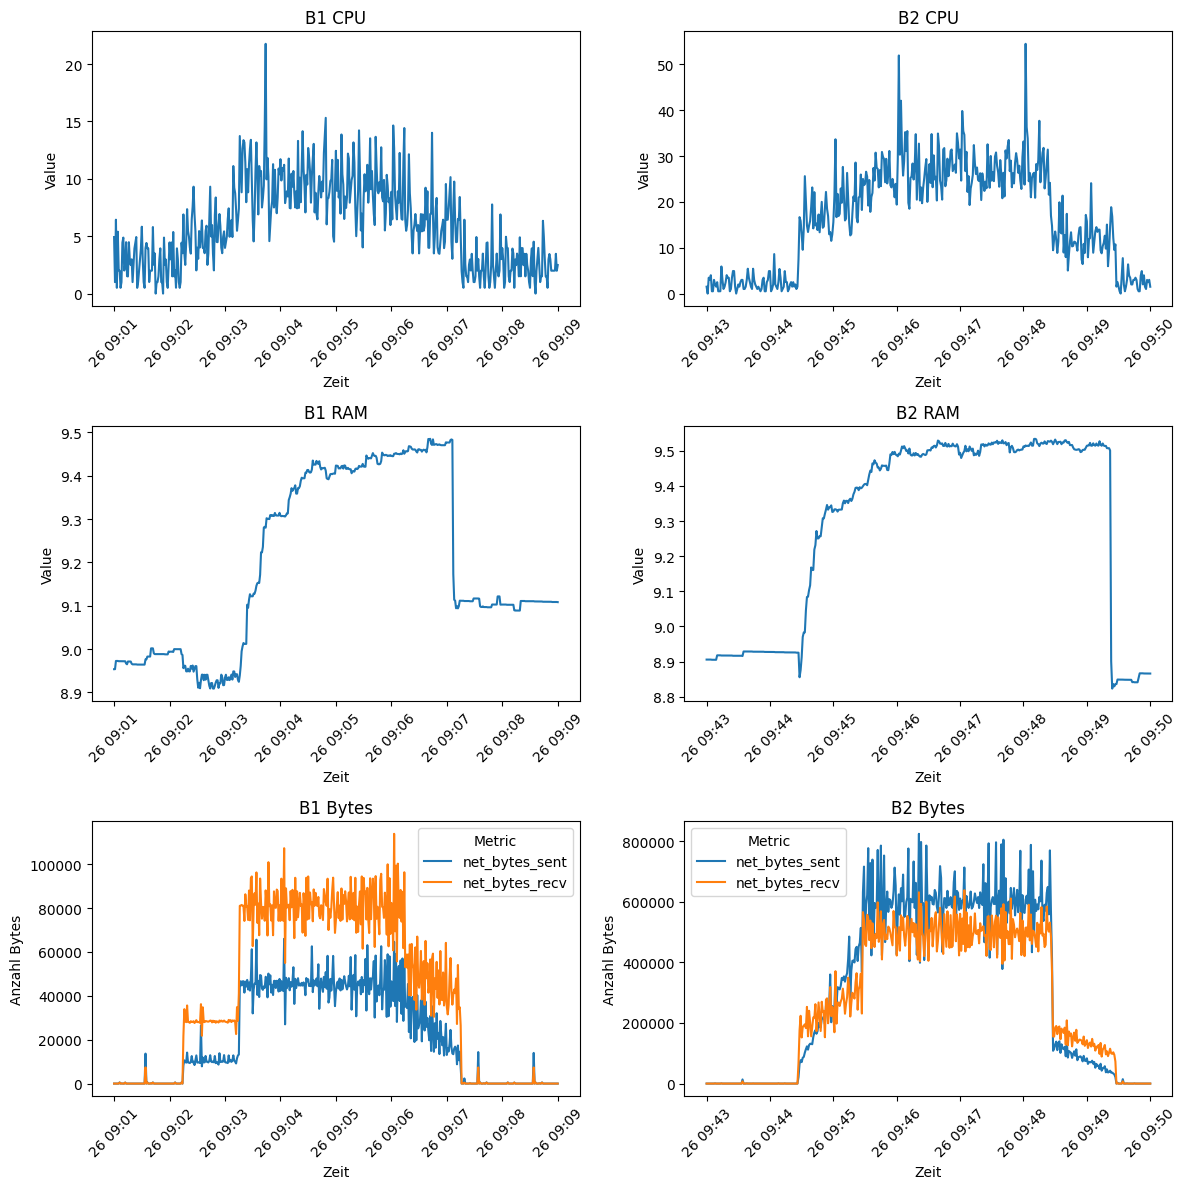

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Plot 1: b1-ram.csv
# ---------------------------
df_b1_ram = pd.read_csv('b1-ram.csv', skiprows=5, header=None, names=['Timestamp', 'Value'])
# Nur Zeilen mit vollständigem Zeitstempel verwenden
df_b1_ram = df_b1_ram[df_b1_ram['Timestamp'].str.contains(r'\d{4}/\d{2}/\d{2}')]
df_b1_ram['Timestamp'] = pd.to_datetime(df_b1_ram['Timestamp'], format='%Y/%m/%d %H:%M:%S')
df_b1_ram['Value'] = pd.to_numeric(df_b1_ram['Value'], errors='coerce')
# Definiere den gewünschten Zeitraum
start_time = pd.to_datetime('2025-01-26 09:01:00')
end_time   = pd.to_datetime('2025-01-26 09:09:00')
df_b1_ram_filtered = df_b1_ram[(df_b1_ram['Timestamp'] >= start_time) & (df_b1_ram['Timestamp'] <= end_time)]

# ---------------------------
# Plot 2: b1-cpu.csv
# ---------------------------
df_b1_cpu = pd.read_csv('b1-cpu.csv', skiprows=5, header=None, names=['Timestamp', 'Value'])
df_b1_cpu = df_b1_cpu[df_b1_cpu['Timestamp'].str.contains(r'\d{4}/\d{2}/\d{2}')]
df_b1_cpu['Timestamp'] = pd.to_datetime(df_b1_cpu['Timestamp'], format='%Y/%m/%d %H:%M:%S')
df_b1_cpu['Value'] = pd.to_numeric(df_b1_cpu['Value'], errors='coerce')
df_b1_cpu_filtered = df_b1_cpu[(df_b1_cpu['Timestamp'] >= start_time) & (df_b1_cpu['Timestamp'] <= end_time)]

# ---------------------------
# Plot 3: b2-ram.csv
# ---------------------------
start_time = pd.to_datetime('2025-01-26 09:43:00')
end_time   = pd.to_datetime('2025-01-26 09:50:00')
df_b2_ram = pd.read_csv('b2-ram.csv', skiprows=5, header=None, names=['Timestamp', 'Value'])
df_b2_ram = df_b2_ram[df_b2_ram['Timestamp'].str.contains(r'\d{4}/\d{2}/\d{2}')]
df_b2_ram['Timestamp'] = pd.to_datetime(df_b2_ram['Timestamp'], format='%Y/%m/%d %H:%M:%S')
df_b2_ram['Value'] = pd.to_numeric(df_b2_ram['Value'], errors='coerce')
df_b2_ram_filtered = df_b2_ram[(df_b2_ram['Timestamp'] >= start_time) & (df_b2_ram['Timestamp'] <= end_time)]

# ---------------------------
# Plot 4: b2-cpu.csv
# ---------------------------
df_b2_cpu = pd.read_csv('b2-cpu.csv', skiprows=5, header=None, names=['Timestamp', 'Value'])
df_b2_cpu = df_b2_cpu[df_b2_cpu['Timestamp'].str.contains(r'\d{4}/\d{2}/\d{2}')]
df_b2_cpu['Timestamp'] = pd.to_datetime(df_b2_cpu['Timestamp'], format='%Y/%m/%d %H:%M:%S')
df_b2_cpu['Value'] = pd.to_numeric(df_b2_cpu['Value'], errors='coerce')
df_b2_cpu_filtered = df_b2_cpu[(df_b2_cpu['Timestamp'] >= start_time) & (df_b2_cpu['Timestamp'] <= end_time)]

# ---------------------------
# Für die Bytes-Daten verwenden wir ein anderes Zeitintervall
# ---------------------------
start_time_bytes = pd.to_datetime('2025-01-26 09:43:00')
end_time_bytes   = pd.to_datetime('2025-01-26 09:50:00')
# Plot 5: b2-bytes.csv
df_b2_bytes = pd.read_csv('b2-bytes.csv', skiprows=5, header=None,
                           names=['Timestamp', 'net_bytes_sent', 'net_bytes_recv'])
df_b2_bytes['Timestamp'] = pd.to_datetime(df_b2_bytes['Timestamp'], format='%Y/%m/%d %H:%M:%S')
df_b2_bytes['net_bytes_sent'] = pd.to_numeric(df_b2_bytes['net_bytes_sent'], errors='coerce')
df_b2_bytes['net_bytes_recv'] = pd.to_numeric(df_b2_bytes['net_bytes_recv'], errors='coerce')
df_b2_bytes_filtered = df_b2_bytes[(df_b2_bytes['Timestamp'] >= start_time_bytes) &
                                   (df_b2_bytes['Timestamp'] <= end_time_bytes)]
df_b2_bytes_melted = df_b2_bytes_filtered.melt(id_vars=['Timestamp'],
                                               value_vars=['net_bytes_sent', 'net_bytes_recv'],
                                               var_name='Metric', value_name='Value')

start_time_bytes = pd.to_datetime('2025-01-26 09:01:00')
end_time_bytes   = pd.to_datetime('2025-01-26 09:09:00')
# Plot 6: b1-bytes.csv
df_b1_bytes = pd.read_csv('b1-bytes.csv', skiprows=5, header=None,
                           names=['Timestamp', 'net_bytes_sent', 'net_bytes_recv'])
df_b1_bytes['Timestamp'] = pd.to_datetime(df_b1_bytes['Timestamp'], format='%Y/%m/%d %H:%M:%S')
df_b1_bytes['net_bytes_sent'] = pd.to_numeric(df_b1_bytes['net_bytes_sent'], errors='coerce')
df_b1_bytes['net_bytes_recv'] = pd.to_numeric(df_b1_bytes['net_bytes_recv'], errors='coerce')
df_b1_bytes_filtered = df_b1_bytes[(df_b1_bytes['Timestamp'] >= start_time_bytes) &
                                   (df_b1_bytes['Timestamp'] <= end_time_bytes)]
df_b1_bytes_melted = df_b1_bytes_filtered.melt(id_vars=['Timestamp'],
                                               value_vars=['net_bytes_sent', 'net_bytes_recv'],
                                               var_name='Metric', value_name='Value')

# ---------------------------
# Erstelle ein Subplot-Grid (3 Zeilen x 2 Spalten)
# ---------------------------
fig, axs = plt.subplots(3, 2, figsize=(12, 12), sharex=False)

# Plot 1: b1-cpu
sns.lineplot(x='Timestamp', y='Value', data=df_b1_cpu_filtered, ax=axs[0, 0])
axs[0, 0].set_title('B1 CPU')
axs[0, 0].set_xlabel('Zeit')
axs[0, 0].set_ylabel('Value')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: b2-cpu
sns.lineplot(x='Timestamp', y='Value', data=df_b2_cpu_filtered, ax=axs[0, 1])
axs[0, 1].set_title('B2 CPU')
axs[0, 1].set_xlabel('Zeit')
axs[0, 1].set_ylabel('Value')
axs[0, 1].tick_params(axis='x', rotation=45)


# Plot 3: b1-ram
sns.lineplot(x='Timestamp', y='Value', data=df_b1_ram_filtered, ax=axs[1, 0])
axs[1, 0].set_title('B1 RAM')
axs[1, 0].set_xlabel('Zeit')
axs[1, 0].set_ylabel('Value')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: b2-cpu
sns.lineplot(x='Timestamp', y='Value', data=df_b2_ram_filtered, ax=axs[1, 1])
axs[1, 1].set_title('B2 RAM')
axs[1, 1].set_xlabel('Zeit')
axs[1, 1].set_ylabel('Value')
axs[1, 1].tick_params(axis='x', rotation=45)

# Plot 5: b1-bytes
sns.lineplot(x='Timestamp', y='Value', hue='Metric', data=df_b1_bytes_melted, ax=axs[2, 0])
axs[2, 0].set_title('B1 Bytes')
axs[2, 0].set_xlabel('Zeit')
axs[2, 0].set_ylabel('Anzahl Bytes')
axs[2, 0].tick_params(axis='x', rotation=45)
axs[2, 0].legend(title='Metric')

# Plot 6: b2-bytes
sns.lineplot(x='Timestamp', y='Value', hue='Metric', data=df_b2_bytes_melted, ax=axs[2, 1])
axs[2, 1].set_title('B2 Bytes')
axs[2, 1].set_xlabel('Zeit')
axs[2, 1].set_ylabel('Anzahl Bytes')
axs[2, 1].tick_params(axis='x', rotation=45)
axs[2, 1].legend(title='Metric')

plt.tight_layout()
plt.savefig('plot.png', dpi=300, bbox_inches='tight')  # Speichert den Plot als PNG
plt.show()


<Figure size 640x480 with 0 Axes>